# Nombre: León Emiliano García Pérez
# Matrícula: A00573074

## Repeating the Tutorial with de Iris Dataset

In [1]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

In [2]:
Ruta = 'datasets'
newUrl = '/iris/iris.csv'

newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])

newDatos = newDatos.dropna() #Dropping missing data

newDatos

,PetalWidth,PetalLength,SepalWidth,SepalLength,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# get the number of observations and variables

print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

Observations:  150
Variables:  5


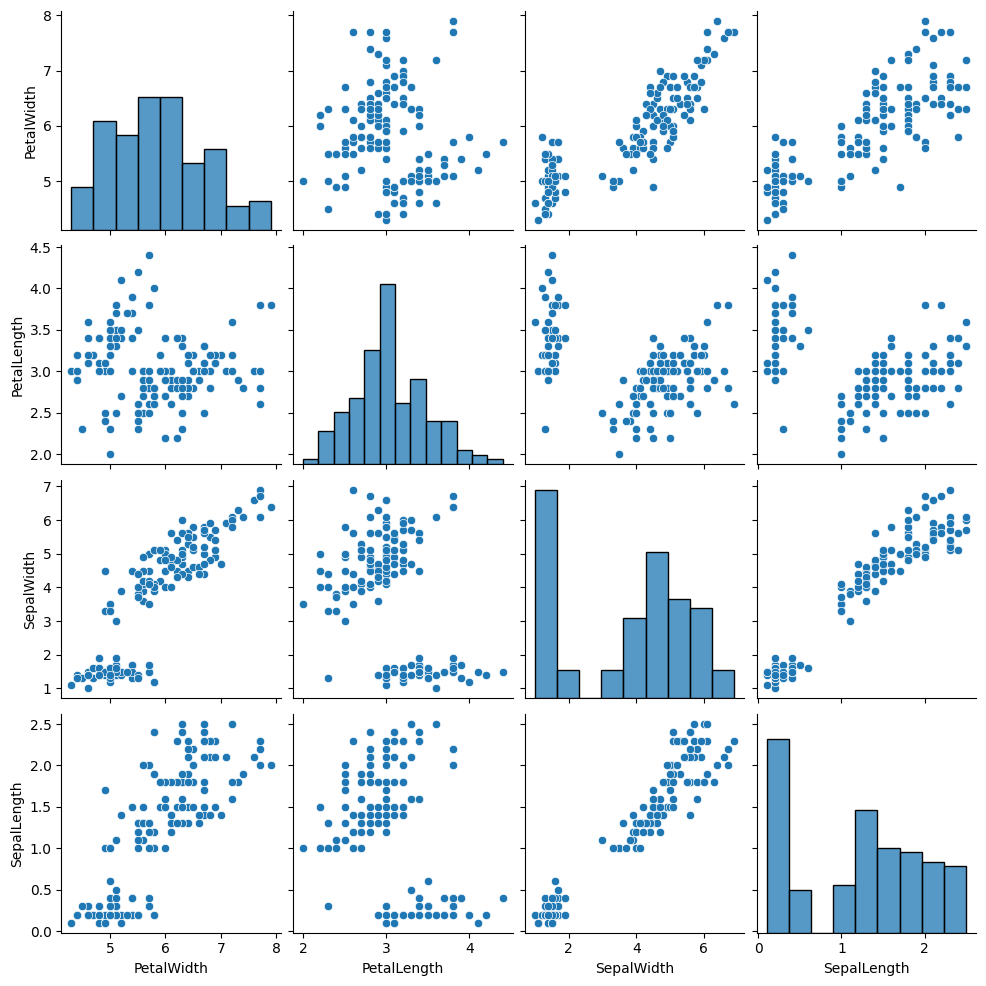

In [4]:
sns.pairplot(newDatos)
plt.show()

In [5]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
datosSinType = newDatos.drop(columns="Type") 
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [6]:
#Add a new column to the dataset with the cluster information

datosSinType["Cluster"] = yestimated

In [7]:
# Label of the estimated clusters

print("ClusterLabels",km.labels_)
print(datosSinType.Cluster.unique())
print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 1 2]
     PetalWidth  PetalLength  SepalWidth  SepalLength  Cluster
0           5.1          3.5         1.4          0.2        0
1           4.9          3.0         1.4          0.2        0
2           4.7          3.2         1.3          0.2        0
3           4.6          3.1         1.5          0.2        0
4           5.0          3.6         1.4          0.2        0
..          ...          ...         ...          ...      ...
145         6.7          3.0         5.2          2.3        1
146         6.3          2.5         5.0          1.9        2
147         6.5          3.0         5.2          2.0        1
148         6.2          3.4         5.4  

In [8]:
# Cluster centroides

print("Cluster Centers: ", km.cluster_centers_)

Cluster Centers:  [[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [9]:
# Sum of squared error (sse) of the final model

print("SSE: ", km.inertia_)

SSE:  78.9450658259773


In [10]:
# The number of iterations required to converge

print("Iterations: ", km.n_iter_)

Iterations:  8


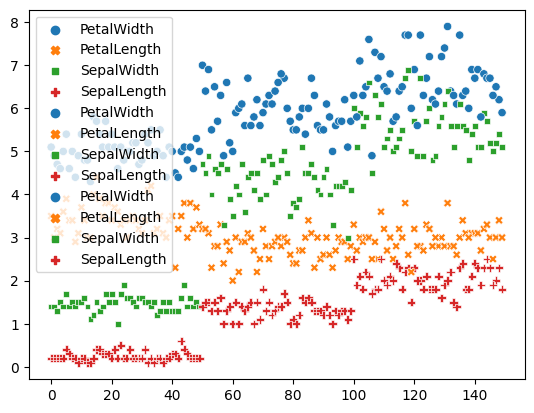

In [11]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")

# Scatter plot of each cluster
sns.scatterplot(data = dfa, color = "red")
sns.scatterplot(data = dfb, color = "green")
sns.scatterplot(data = dfc, color = "blue")
plt.show()

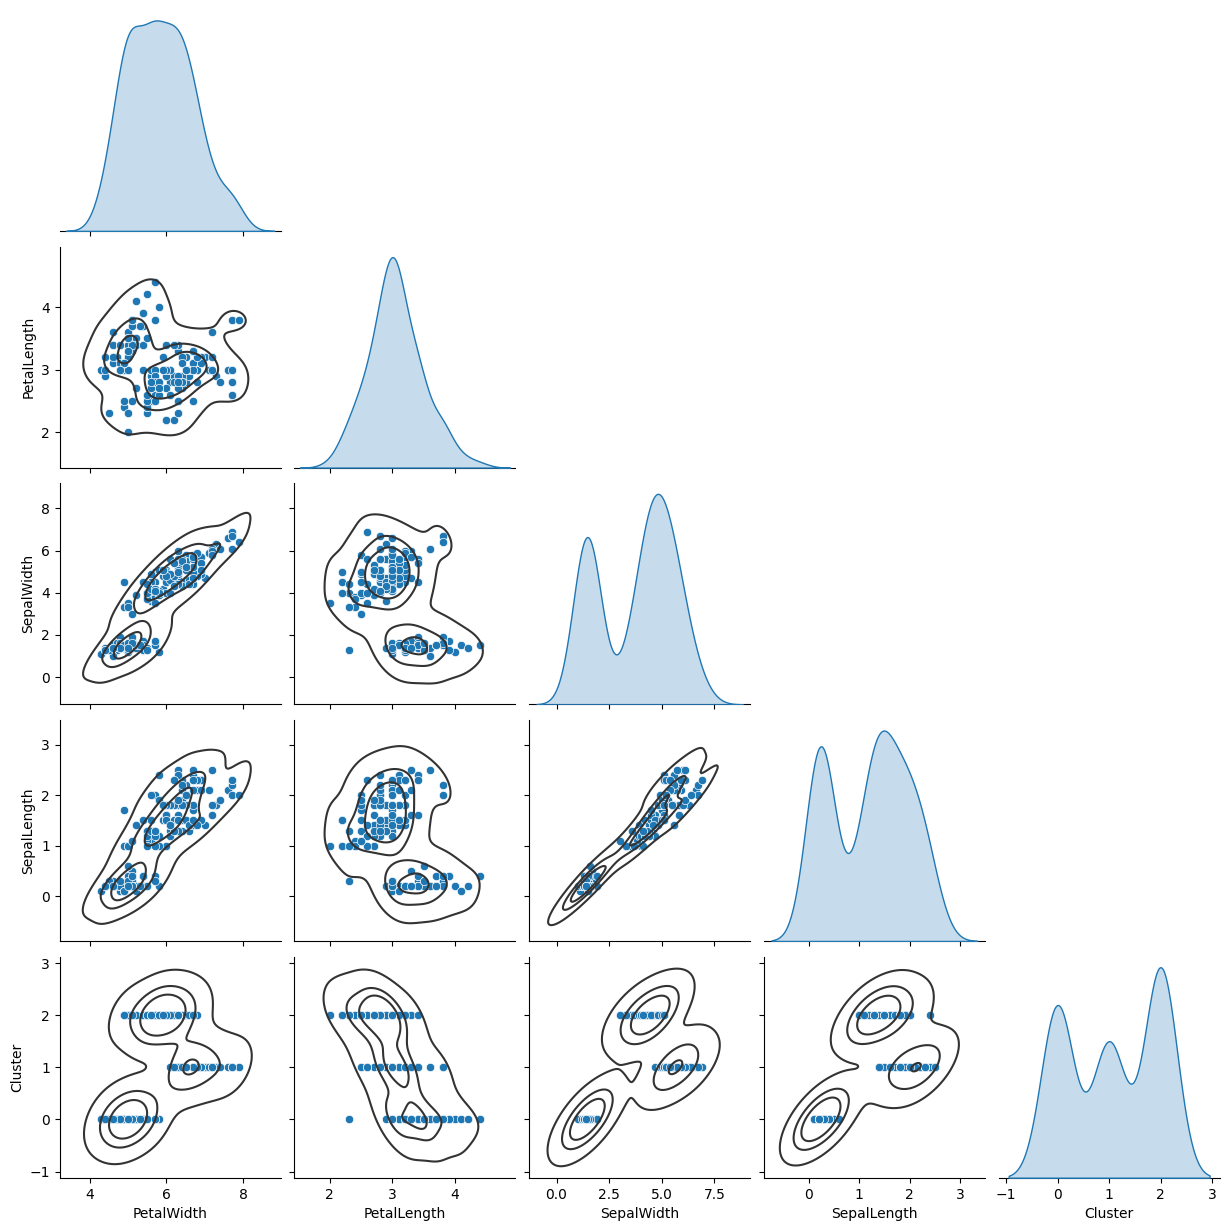

In [12]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [13]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k
K = [1,2,3,4,5,6,7,8,9,10]

# For each k
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)

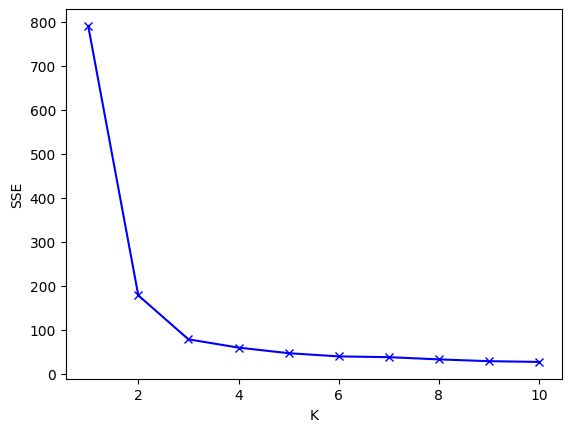

In [14]:
# Plot sse versus k

plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics

### Do clustering with the iris flower dataset to form clusters using as features the four features NOTE: THE PROFESSOR SAID THAT THIS PART OF THE ACTIVITY IT IS THE SAME THAN REPEAT THE TUTORIAL WITH THE IRIS DATASET

In [15]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

In [16]:
newUrl = '/iris/iris.csv'

newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])
newDatos = newDatos.dropna() #Dropping missing data

# Print the dataframe
newDatos

,PetalWidth,PetalLength,SepalWidth,SepalLength,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
# get the number of observations and variables
print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

Observations:  150
Variables:  5


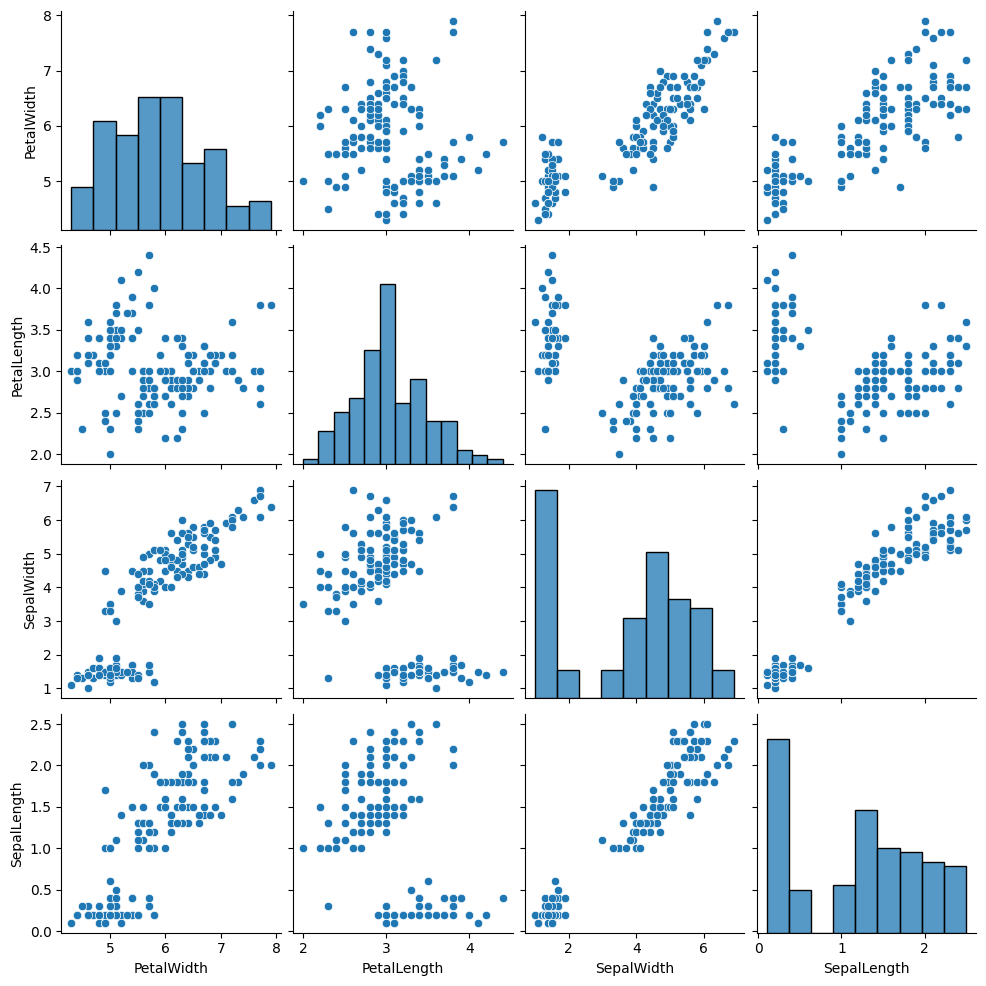

In [18]:
sns.pairplot(newDatos)
plt.show()

In [19]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
datosSinType = newDatos.drop(columns="Type") 
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [20]:
#Add a new column to the dataset with the cluster information
datosSinType["Cluster"] = yestimated

In [21]:
#Creating a DF to the Fourth Part of the Activiy
ClusterComparative = pd.DataFrame({'ClusterWithAllMeasures': yestimated})

In [22]:
# Label of the estimated clusters
print("ClusterLabels",km.labels_)
print(datosSinType.Cluster.unique())
print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 1 2]
     PetalWidth  PetalLength  SepalWidth  SepalLength  Cluster
0           5.1          3.5         1.4          0.2        0
1           4.9          3.0         1.4          0.2        0
2           4.7          3.2         1.3          0.2        0
3           4.6          3.1         1.5          0.2        0
4           5.0          3.6         1.4          0.2        0
..          ...          ...         ...          ...      ...
145         6.7          3.0         5.2          2.3        1
146         6.3          2.5         5.0          1.9        2
147         6.5          3.0         5.2          2.0        1
148         6.2          3.4         5.4  

In [23]:
# Cluster centroides
print("Cluster Centers: ", km.cluster_centers_)

Cluster Centers:  [[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [24]:
# Sum of squared error (sse) of the final model
print("SSE: ", km.inertia_)

SSE:  78.9450658259773


In [25]:
# The number of iterations required to converge
print("Iterations: ", km.n_iter_)

Iterations:  8


In [26]:
#Saving the Data to the Fourth Part of the Activiy
allMeasuresSSE = km.inertia_
allMeasuresIterations = km.n_iter_

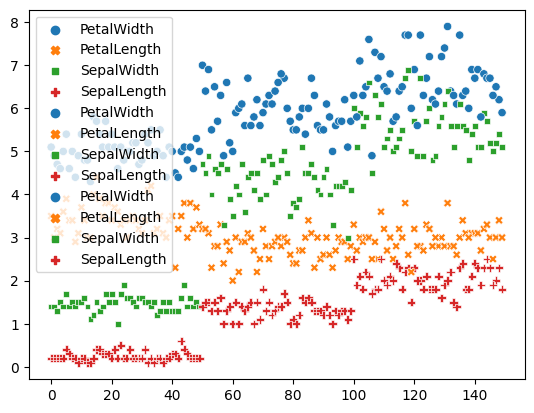

In [27]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")

# Scatter plot of each cluster
sns.scatterplot(data = dfa, color = "red")
sns.scatterplot(data = dfb, color = "green")
sns.scatterplot(data = dfc, color = "blue")
plt.show()

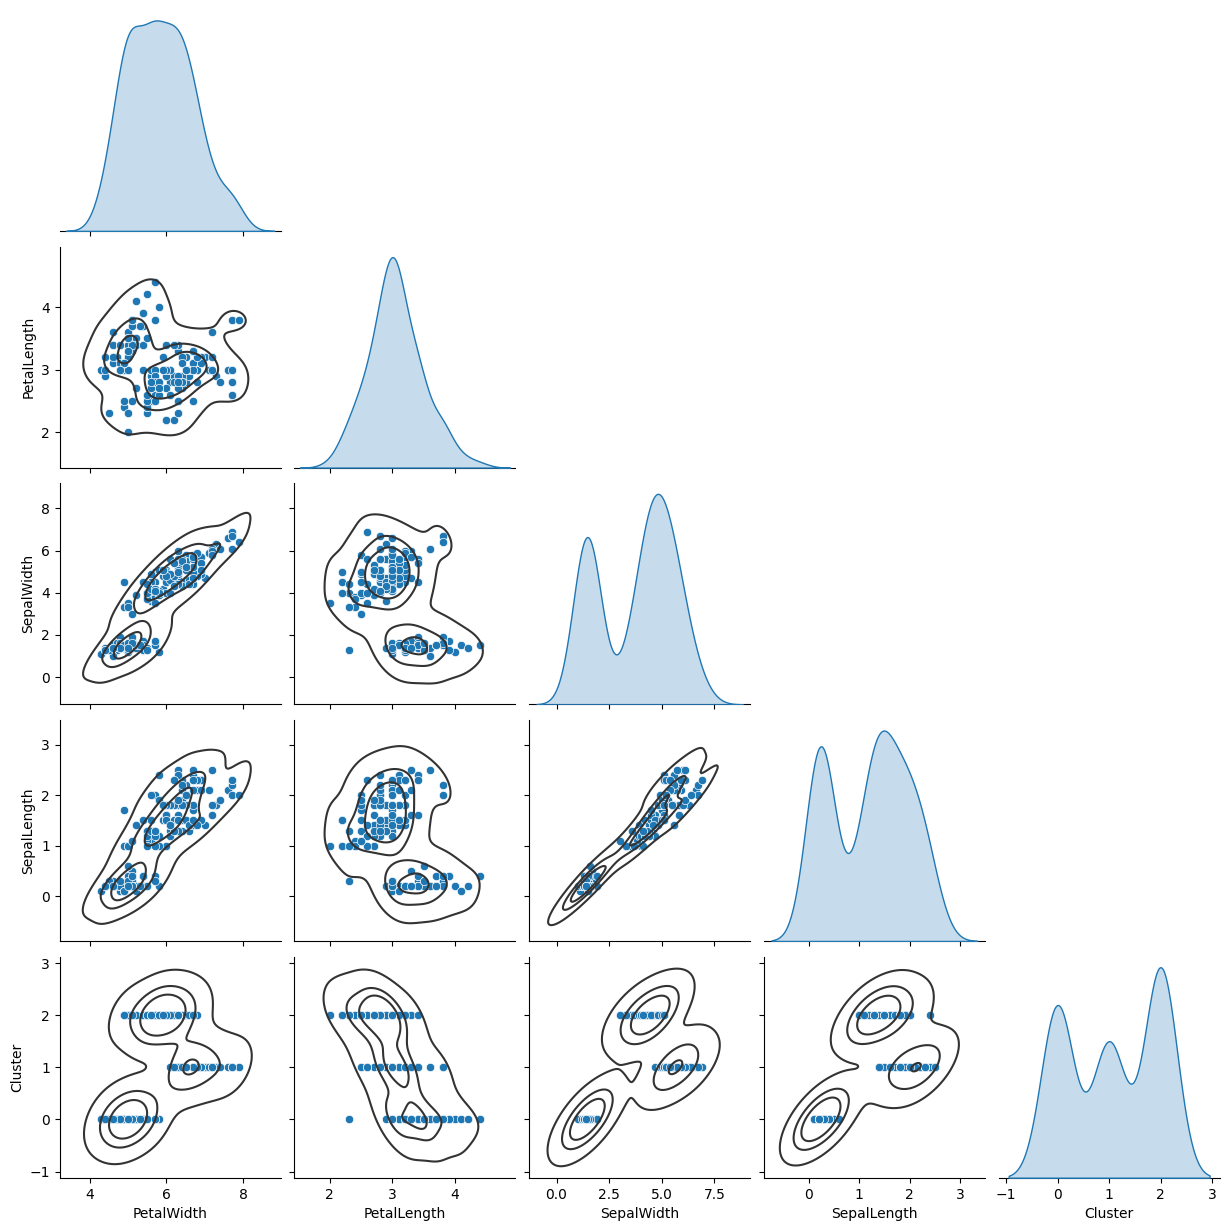

In [28]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [29]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k
K = [1,2,3,4,5,6,7,8,9,10]

# For each k
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)

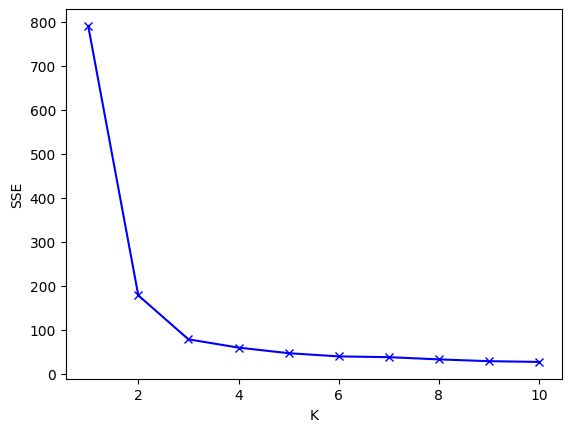

In [30]:
# Plot sse versus k

plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

In [31]:
newUrl = '/iris/iris.csv'
newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])
newDatos = newDatos.dropna() #Dropping missing data
newDatos = newDatos.drop(columns="SepalWidth")
newDatos = newDatos.drop(columns="SepalLength")

# Print the dataframe
newDatos

,PetalWidth,PetalLength,Type
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


Observations:  150
Variables:  3


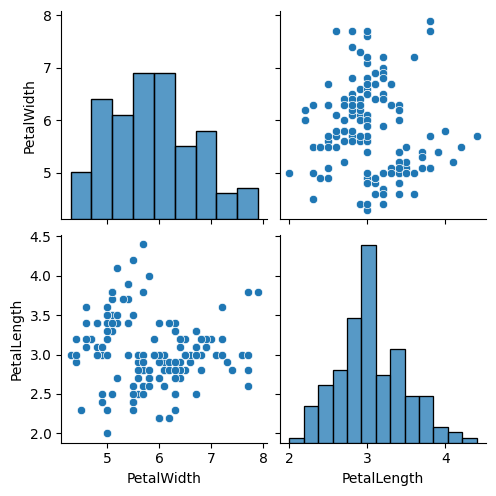

In [32]:
# get the number of observations and variables

print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

sns.pairplot(newDatos)
plt.show()

In [33]:
datosSinType = newDatos.drop(columns="Type") 

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [34]:
#Add a new column to the dataset with the cluster information
datosSinType["Cluster"] = yestimated

In [35]:
#Attaching to a DF to the Fourth Part of the Activiy
ClusterComparative["ClusterWithPetalMeasures"] = yestimated

In [36]:
# Label of the estimated clusters
print("ClusterLabels",km.labels_)
print(datosSinType.Cluster.unique())
print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 0 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 1 2]
     PetalWidth  PetalLength  Cluster
0           5.1          3.5        0
1           4.9          3.0        0
2           4.7          3.2        0
3           4.6          3.1        0
4           5.0          3.6        0
..          ...          ...      ...
145         6.7          3.0        1
146         6.3          2.5        2
147         6.5          3.0        1
148         6.2          3.4        1
149         5.9          3.0        2

[150 rows x 3 columns]


In [37]:
# Cluster centroides
print("Cluster Centers: ", km.cluster_centers_)

# Sum of squared error (sse) of the final model
print("SSE: ", km.inertia_)

# The number of iterations required to converge
print("Iterations: ", km.n_iter_)

Cluster Centers:  [[5.00392157 3.4       ]
 [6.82391304 3.07826087]
 [5.8        2.7       ]]
SSE:  37.14117220801364
Iterations:  17


In [38]:
#Saving the Data to the Fourth Part of the Activiy
petalMeasuresSSE = km.inertia_
petalMeasuresIterations = km.n_iter_

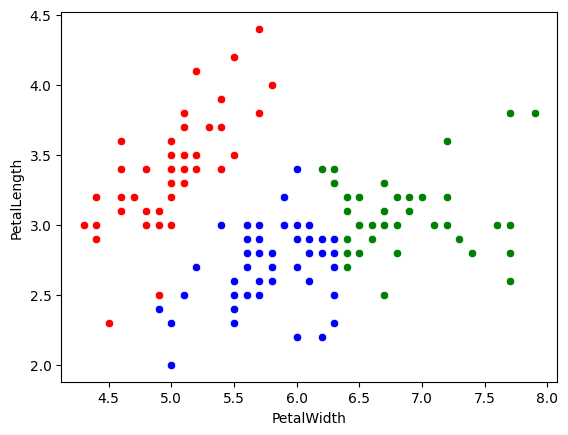

In [39]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")

# Scatter plot of each cluster
sns.scatterplot(data = dfa, x="PetalWidth",y="PetalLength", color = "red")
sns.scatterplot(data = dfb, x="PetalWidth",y="PetalLength", color = "green")
sns.scatterplot(data = dfc, x="PetalWidth",y="PetalLength", color = "blue")
plt.show()

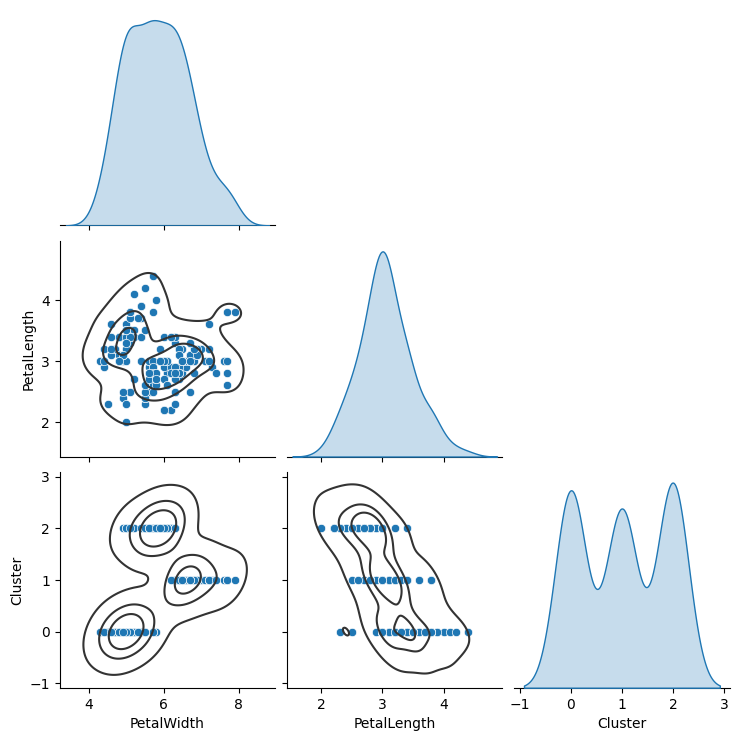

In [40]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

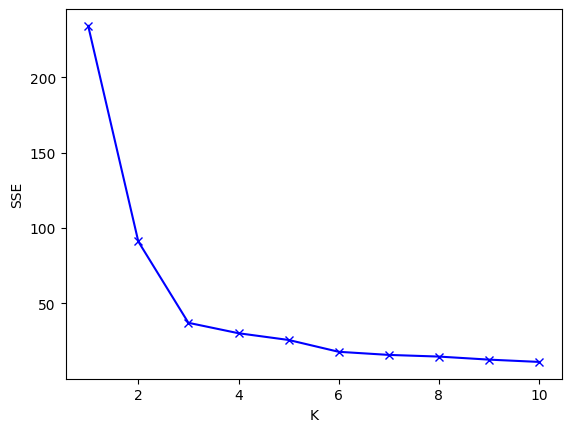

In [41]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k
K = [1,2,3,4,5,6,7,8,9,10]

# For each k
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)
    
# Plot sse versus k
plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

In [42]:
newUrl = '/iris/iris.csv'
newDatos = pd.read_csv(Ruta+newUrl, header=None, names = ["PetalWidth", "PetalLength", "SepalWidth", "SepalLength", "Type"])
newDatos = newDatos.dropna() #Dropping missing data
newDatos = newDatos.drop(columns="PetalWidth")
newDatos = newDatos.drop(columns="PetalLength")

# Print the dataframe
newDatos

,SepalWidth,SepalLength,Type
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


Observations:  150
Variables:  3


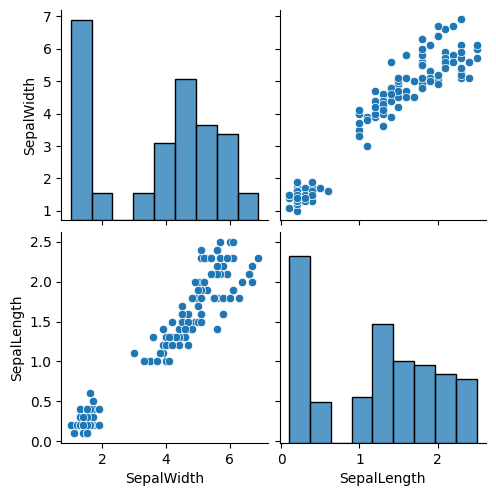

In [43]:
# get the number of observations and variables
print("Observations: ", newDatos.shape[0])
print("Variables: ", newDatos.shape[1]) 

sns.pairplot(newDatos)
plt.show()

In [44]:
datosSinType = newDatos.drop(columns="Type") 

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  =  3 
km = kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(datosSinType)

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(datosSinType)

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
#Add a new column to the dataset with the cluster information
datosSinType["Cluster"] = yestimated

In [46]:
#Attaching to a DF to the Fourth Part of the Activiy
ClusterComparative["ClusterWithSepalMeasures"] = yestimated

In [47]:
# Label of the estimated clusters
print("ClusterLabels",km.labels_)
print(datosSinType.Cluster.unique())
print(datosSinType)

ClusterLabels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[0 2 1]
     SepalWidth  SepalLength  Cluster
0           1.4          0.2        0
1           1.4          0.2        0
2           1.3          0.2        0
3           1.5          0.2        0
4           1.4          0.2        0
..          ...          ...      ...
145         5.2          2.3        1
146         5.0          1.9        1
147         5.2          2.0        1
148         5.4          2.3        1
149         5.1          1.8        1

[150 rows x 3 columns]


In [48]:
# Cluster centroides
print("Cluster Centers: ", km.cluster_centers_)

# Sum of squared error (sse) of the final model
print("SSE: ", km.inertia_)

# The number of iterations required to converge
print("Iterations: ", km.n_iter_)

Cluster Centers:  [[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
SSE:  31.387758974358977
Iterations:  6


In [49]:
#Saving the Data to the Fourth Part of the Activiy
sepalMeasuresSSE = km.inertia_
sepalMeasuresIterations = km.n_iter_

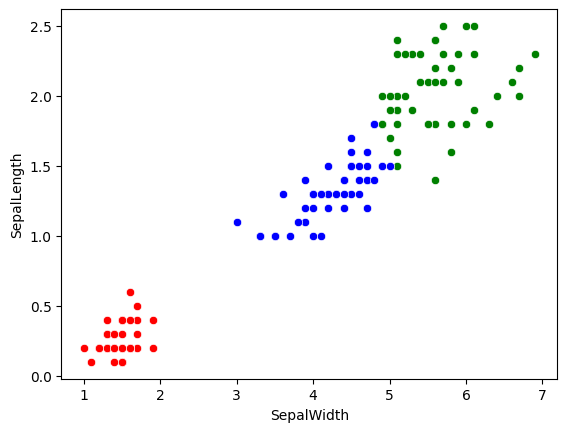

In [50]:
# Get a dataframe with the data of each clsuter
dfa = datosSinType[datosSinType["Cluster"] == 0].drop(columns="Cluster")
dfb = datosSinType[datosSinType["Cluster"] == 1].drop(columns="Cluster")
dfc = datosSinType[datosSinType["Cluster"] == 2].drop(columns="Cluster")

# Scatter plot of each cluster
sns.scatterplot(data = dfa, x="SepalWidth",y="SepalLength", color = "red")
sns.scatterplot(data = dfb, x="SepalWidth",y="SepalLength", color = "green")
sns.scatterplot(data = dfc, x="SepalWidth",y="SepalLength", color = "blue")
plt.show()

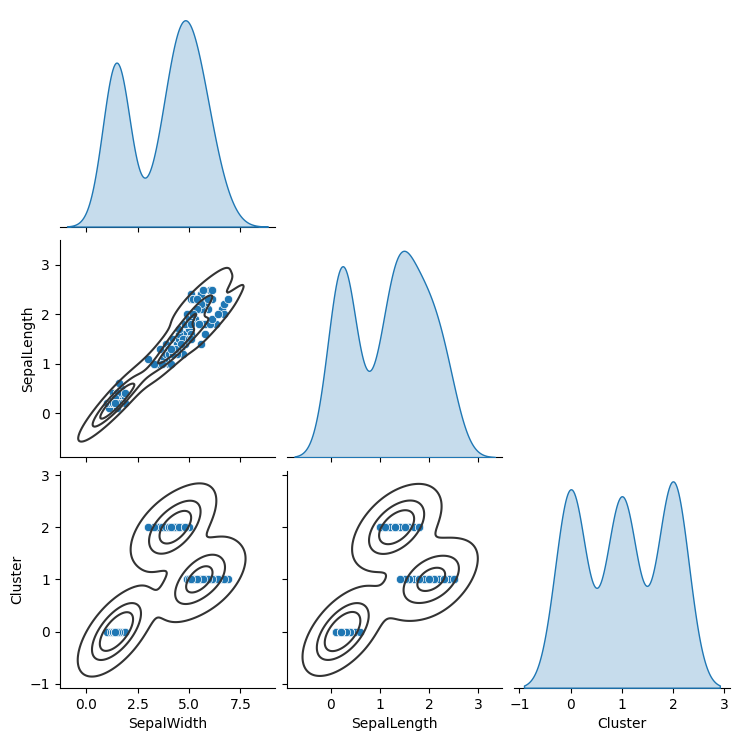

In [51]:
plot = sns.pairplot(datosSinType, corner=True, diag_kind="kde")
plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

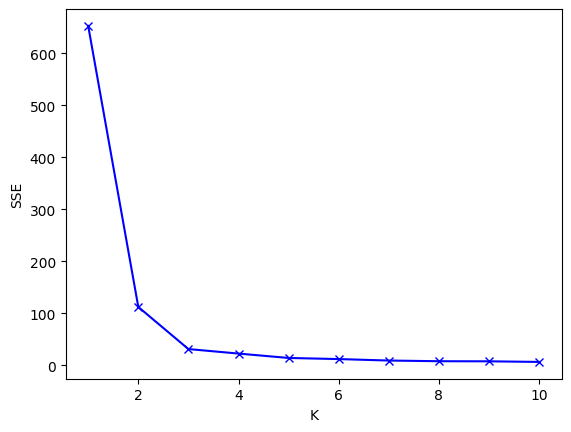

In [52]:
# Intialize a list to hold sum of squared error (sse)
SSE = []

# Define values of k
K = [1,2,3,4,5,6,7,8,9,10]

# For each k
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(datosSinType)
    SSE.append(km.inertia_)
    
# Plot sse versus k
plt.plot(K, SSE, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics NOTE: THE PROFESSOR SAID THAT THIS PART OF THE ACTIVITY IS NOT NECESSARY TO BE DO IT, BECAUSE THE SOLUTION IS NOT A TRIVIAL SOLUTION. BUT, HERE IS AN APPROACH BASED ON THE PERSONAL EXPLANATION PROVIDED BY THE PROFESSOR.

In [53]:
ClusterComparative

,ClusterWithAllMeasures,ClusterWithPetalMeasures,ClusterWithSepalMeasures
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
145,1,1,1
146,2,2,1
147,1,1,1
148,1,1,1


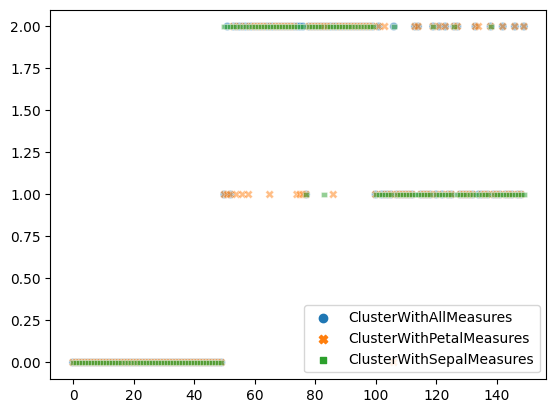

In [54]:
sns.scatterplot(ClusterComparative, alpha=0.5)
plt.show()

In [55]:
#Result off the SSEs and Iterations
print("--- SSEs results: ")
print("------ All Sepal Measures: ",allMeasuresSSE)
print("------ Petal Measures: ",petalMeasuresSSE)
print("------ Sepal Measures: ",sepalMeasuresSSE)
print()
print("--- Iterations results: ")
print("------ All Sepal Measures: ",allMeasuresIterations)
print("------ Petal Measures: ",petalMeasuresIterations)
print("------ Sepal Measures: ",sepalMeasuresIterations)

--- SSEs results: 
------ All Sepal Measures:  78.9450658259773
------ Petal Measures:  37.14117220801364
------ Sepal Measures:  31.387758974358977

--- Iterations results: 
------ All Sepal Measures:  8
------ Petal Measures:  17
------ Sepal Measures:  6


In [56]:
print("Which one provides the better grouping?")
print()
print("It could be pointed out, depending on the different Clusters extracted, that the one that generates a better grouping is the one based on the measurement of the Sepals; and this can be seen reflected within the visual representation where it perfectly fits the three classifications, likewise, the quality and efficiency of the Cluster is denoted by having a lower SSE compared to the other two Clusters based on other measures, and also it is seen in the least need of iterations necessary to converge. It should be noted that all of the above is done in full knowledge that there are only three initial classifications in the data.")
print()
print("Se podría señalar, en función de los diferentes Clústeres extraídos, que el que genera una mejor agrupación es el fundamentado en la medida de los Sépalos; y esto se puede ver reflejado dentro de la representación visual en donde se ajusta perfectamente a las tres clasificaciones, así mismo, se denota la calidad y eficiencia del Clúster al tener un SSE menor respecto a los otros dos Clústeres fundamentados en otras medidas, y también se ve en la menor necesidad de iteraciones necesarias para converger. Cabe recalcar que, todo lo anterior, se hace desde el conocimiento pleno de que en los datos solo existen tres clasificaciones iniciales.")

Which one provides the better grouping?

It could be pointed out, depending on the different Clusters extracted, that the one that generates a better grouping is the one based on the measurement of the Sepals; and this can be seen reflected within the visual representation where it perfectly fits the three classifications, likewise, the quality and efficiency of the Cluster is denoted by having a lower SSE compared to the other two Clusters based on other measures, and also it is seen in the least need of iterations necessary to converge. It should be noted that all of the above is done in full knowledge that there are only three initial classifications in the data.

Se podría señalar, en función de los diferentes Clústeres extraídos, que el que genera una mejor agrupación es el fundamentado en la medida de los Sépalos; y esto se puede ver reflejado dentro de la representación visual en donde se ajusta perfectamente a las tres clasificaciones, así mismo, se denota la calidad y eficienc